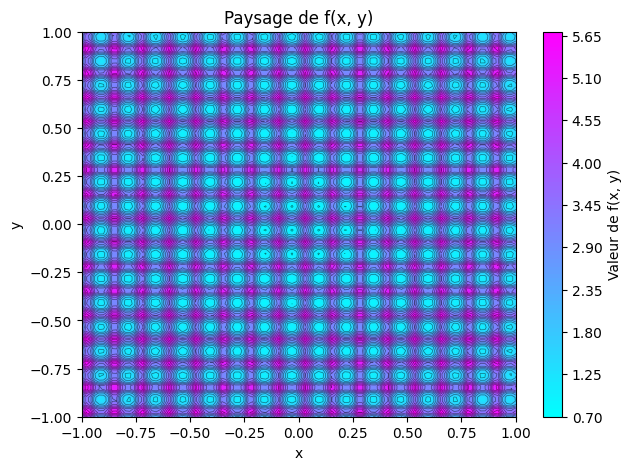

In [54]:
#Etape 1: Visualiser le paysage de f sur [−1, 1]^2 (heat-map + iso-lines)

import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.exp(np.sin(50 * x)) + np.exp(np.sin(50 * y)) + (x**2 + y**2)/4

# Création d’une grille régulière de points
x = np.linspace(-1, 1, 100) #creer 100 points entre -1 et 1
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)  # Grille 2D
Z = f(X, Y)  # Calcul des valeurs de f sur la grille

# Tracé de la carte de chaleur(Heat-map)
plt.figure(figsize=(7, 5)) #taille du figure 
plt.contourf(X, Y, Z, levels=100, cmap='cool') # Heat-map avec "cool" une palette de couleurs
plt.colorbar(label='Valeur de f(x, y)') #ajout d'une legende a droite pour heatmap
plt.contour(X, Y, Z, levels=15, colors='black', linewidths=0.5, alpha=0.5)#iso-lines
plt.title("Paysage de f(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [67]:
#Etape 2 : Rechercher le minimum global par recuit simulé.

from scipy.optimize import dual_annealing #fonction de recuit simule
import numpy as np

I = [(-1, 1), (-1, 1)]# les bornes d'exploration pour x et y
result = dual_annealing(lambda xy: f(xy[0], xy[1]),I)
print("Un minimum global approché trouvé par recuit simulé :")
print("x =", result.x[0], " y =", result.x[1])
print("f(x, y) =", result.fun)


Un minimum global approché trouvé par recuit simulé :
x = -0.03139886133222597  y = -0.031398861382689096
f(x, y) = 0.7362520944251066


In [68]:
#Etape 3(a): Rechercher le minimum global avec CMA-ES

import cma

def la_fonction(x):
    return f(x[0], x[1])

# Paramètres de départ : centre initial [0, 0], et écart-type initial 0.5

res = cma.CMAEvolutionStrategy([0, 0], 0.5, {'verbose': -9})
res.optimize(la_fonction)
print("Un minimum global approché trouvé par CMA-ES :")
print("x =", res.result.xbest[0], " y =", res.result.xbest[1])
print("f(x, y) =", res.result.fbest)


 Un minimum global approché trouvé par CMA-ES :
x = -0.031398856273216806  y = -0.03139885705106796
f(x, y) = 0.7362520944250838


In [81]:
#Etape 3(b) : Compraison du temps et d'iteration
from scipy.optimize import dual_annealing 
import cma
import time

# -------- Recuit simulé (dual_annealing) --------
I = [(-1, 1), (-1, 1)]
start_r= time.time()
result_r= dual_annealing(la_fonction, I)
end_r= time.time()

# -------- CMA-ES -------
start_cma = time.time()
result_cma = cma.fmin(la_fonction, x0=[0, 0], sigma0=0.5,  options={'verb_disp': 0, 'bounds':[-1,1]})
x_best = result_cma[0]       # point minimum trouvé
f_best = result_cma[1]      # valeur minimale
iters   = result_cma[3]  
end_cma = time.time()

# -------- Affichage des résultats --------
print("Résultats du Recuit simulé (dual_annealing) ")
print("Point trouvé :", result_r.x)
print("Valeur de f :", result_r.fun)
print("Temps d'exécution :", end_r - start_r, "secondes")
print("Itérations :", result_r.nit) #nombre d'itération


print("\nRésultats de CMA-ES")
print("Point trouvé :",x_best)
print("Valeur de f :", f_best)
print("Temps d'exécution :", end_cma - start_cma, "secondes")
print("Itérations :",iters)



Résultats du Recuit simulé (dual_annealing) 
Point trouvé : [-0.03139886 -0.03139886]
Valeur de f : 0.7362520944251063
Temps d'exécution : 0.22687911987304688 secondes
Itérations : 1000

Résultats de CMA-ES
Point trouvé : [ 0.22466907 -0.15506644]
Valeur de f : 0.7667629842784154
Temps d'exécution : 0.24765419960021973 secondes
Itérations : 697


In [86]:
#Etape 4 : Enregistrer toutes les optima locaux détectés (>100 essais aléatoires).

import pandas as pd
import numpy as np
import cma

N = 120  # Nombre d'essais aléatoires
optima = []

for i in range(N):
    x0 = np.random.uniform(-1, 1, size=2)  # point initial aléatoire
    result = cma.fmin(la_fonction,x0,sigma0=0.5,options={'bounds': [-1, 1], 'verb_disp': 0})
    point = result[0]  # coordonnées
    value = result[1]  # valeur de f
    optima.append((point, value))

# Affichage de tous les optima détectés 
print(f"\nNombre total d'essais : {N}")
print(f"\nListe complète des optima détectés :\n")

for i, (pt, val) in enumerate(optima):
    x, y = np.round(pt[0], 6), np.round(pt[1], 6) # pour arrondir (pt[ ]), a 6 chiffres apres la virgule
    val = np.round(val, 6)
    print(f"{i+1:>3}. f({x}, {y}) = {val}")

  
#pour enregistrer tous les optima locaux detecte( dans un fichier csv)
df = pd.DataFrame([(x[0], x[1], fx) for x, fx in optima], columns=["x", "y", "f(x,y)"])
df.to_csv("optima.csv", index=False)





Nombre total d'essais : 120

Liste complète des optima détectés :

  1. f(0.215948, -0.275053) = 0.801466
  2. f(-0.408185, -0.156994) = 0.7836
  3. f(-0.033302, 0.226956) = 0.773843
  4. f(0.716533, 0.089712) = 0.892657
  5. f(0.474407, 0.347378) = 0.828325
  6. f(-0.412992, -0.028279) = 0.792894
  7. f(0.094197, 0.094197) = 0.740198
  8. f(-0.156994, -0.910567) = 0.94932
  9. f(0.470983, 0.596578) = 0.88027
 10. f(-0.031438, 0.216159) = 0.7542
 11. f(0.343975, -0.28693) = 0.795218
 12. f(-0.28259, -0.28259) = 0.775709
 13. f(0.219792, 0.094197) = 0.750062
 14. f(-0.27505, 0.097737) = 0.790576
 15. f(-0.163727, 0.723106) = 0.894012
 16. f(-0.029966, 0.208641) = 0.80935
 17. f(-0.156994, -0.28259) = 0.761899
 18. f(0.232383, -0.532668) = 0.897276
 19. f(0.849172, -0.159464) = 0.925418
 20. f(0.219792, -0.28259) = 0.767818
 21. f(0.084786, -0.03436) = 0.784559
 22. f(-0.40367, -0.033461) = 0.789119
 23. f(-0.536185, 0.213887) = 0.838073
 24. f(-0.027723, -0.282722) = 0.762242
 25. f(-0

In [97]:
#Etape 5 : Ici j'utilises des expériences numériques (ex:N essais avec CMA-ES ) pour formuler une conjecture sur le nombre moyen d’optima locaux dans le carré [−1,1]^2.

import numpy as np
import cma

tol = 1e-5  # Tolérance pour considérer deux optima comme identiques


# Pour plusieurs tailles d'échantillons
for N in [100, 110, 120]:
    optima = []
    # Étape 1 : détecter tous les optima locaux
    for _ in range(N):
        x0 = np.random.uniform(-1, 1, size=2)
        result = cma.fmin(la_fonction, x0, 0.1, options={'bounds': [-1, 1], 'verb_disp': 0})
        point = result[0]
        value = result[1]
        optima.append((tuple(point), value))

    # Étape 2 : grouper par valeurs uniques
    valeurs_uniques = []
    for pt, val in optima:
        if not any(abs(val - v) < tol for _, v in valeurs_uniques):#Deux valeurs sont considérées comme identiques si leur différence absolue est < 1e-5,on conserve ce qui sont distincts
            valeurs_uniques.append((pt, val))

    # Étape 3 : afficher les résultats
    print(f"\nNombre total d’essais : {N}")
    print(f"Nombre d’optima locaux distincts (tolérance {tol}) : {len(valeurs_uniques)}")







Nombre total d’essais : 100
Nombre d’optima locaux distincts (tolérance 1e-05) : 79

Nombre total d’essais : 110
Nombre d’optima locaux distincts (tolérance 1e-05) : 82

Nombre total d’essais : 120
Nombre d’optima locaux distincts (tolérance 1e-05) : 96
